In [1]:
%pylab inline 
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [2]:
#costo de llenar el album y numero de intentos 
AlbCompleto = range(1,641) 

def conteoFichas():
    alb = []
    tries = 1
    costo = 0
    while len(alb) < 640:
        a = random_integers(1,640, size =None)
        ficha = a
        if ficha not in alb:
            alb.append(ficha)
        tries = tries + 1
    costo = tries*400 
   
    return costo


In [3]:
conteoFichas()

1629600

In [4]:

def repetirAlbum(numAlbumes): # esta funcion llena 10^5 albumes una vez
        temp = zeros((numAlbumes))
        for i in range(numAlbumes):
            temp[i] = conteoFichas()
        return temp            
#una funcion que llena 10 veces 10^5 albumes

def repetirMuchasVeces(numAlbumes,numVeces):
        temp1 = zeros((numVeces,numAlbumes))
        for j in range((numVeces)):
            temp1[j,:] = repetirAlbum(numAlbumes)
            print j
        return temp1    
    
  
        
       

In [5]:
costos = repetirMuchasVeces(10000,1) #dado que 100.000 supera ampliamente la memoria del computador, tuvimos que bajarlo. 
costos    

0


array([[ 1615600.,  1628400.,  1759200., ...,  1792800.,  1467200.,
         1567200.]])

In [6]:
print mean (costos)
print var (costos)
print shape(costos[0])
print len(costos[0])
print type(costos[0])
print costos[0][:]

1801001.24
104509912638.0
(10000,)
10000
<type 'numpy.ndarray'>
[ 1615600.  1628400.  1759200. ...,  1792800.  1467200.  1567200.]


In [7]:

def calcularValores(arreglito10):
    media = mean(arreglito10)
    varianza = var(arreglito10)
    return media,varianza
def calcularValoresGrande(costos):
    arregloMedias=np.zeros(1000)
    arregloVarianzas=np.zeros(1000)
    i=0
    k=1
    while k <1000:
        i=10*k
        arreglito=np.zeros(i)
        
        for j in range(i):
            man= costos[j]
            arreglito[j]=man
        
        medita,variancita=calcularValores(arreglito)
        #meterlos
        arregloMedias[k] = medita
        arregloVarianzas[k]= variancita
        k=k+1
        
    return arregloMedias,arregloVarianzas





In [8]:
medias,varianzas=calcularValoresGrande(costos[0][:])

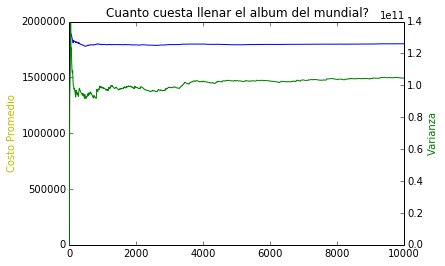

In [9]:
muestra = linspace(0,10000,1000)
fig1,ax1 = subplots()
ax1.plot(muestra,medias,'b')
ax1.set_ylabel('Costo Promedio',color='y')
ax2 = ax1.twinx()
ax2.plot(muestra,varianzas,'g')
ax2.set_ylabel('Varianza ',color='g')
title('Cuanto cuesta llenar el album del mundial?')

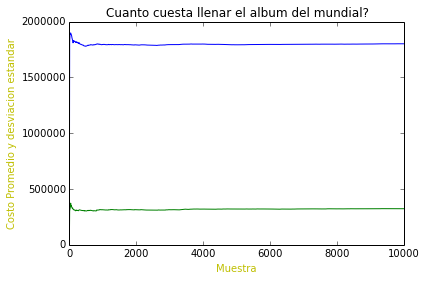

In [10]:
title('Cuanto cuesta llenar el album del mundial?')
muestra = linspace(0,10000,1000)
plot(muestra,medias,'b',muestra,varianzas**(0.5),'g')
ylabel('Costo Promedio y desviacion estandar',color='y')
xlabel('Muestra', color = 'y') #el verde es la desviacion estandar, azul es promedio

In [11]:
mediaTotal = mean(costos)


Para responder a la pregunta de cuanto cuesta llenar el album, por la grafica y los valores obtenidos vemos que
el valor promedio corresponde a 1800909.6 +-800000 , sin embargo dado que la varianza es alta y un alto valor de la varianza indicará una alta dispersión de los valores de la variable alrededor de su media, podemos decir que dicha media será poco representativa, es por eso que solo podemos decir que es un proceso altamente estocastico.Aun asi, con el valor de la desviacion estandar tenemos ese resultado. Ahora veamos el b). 
    

In [12]:
VarianzaTotal = var(costos)

In [13]:

E = abs(medias - mediaTotal) #para este caso, dado que cambiamos el 10^5 inicial, 10^-6 no tiene sentido, as[i que tomamos 10**3


In [14]:
E[E<100]
mins = np.where(E<1000)
mins[0]#seleccionamos los que cumplen que son menores a 10**3.


array([ 84, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927,
       928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940,
       941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953,
       954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966,
       967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979,
       980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992,
       993, 994, 995, 996, 997, 998, 999])

In [15]:
a = mins[0] 

#este for encuentra los valores de m para los cuales la probabilidad de restar las medias, E, es mayor o igual
# a 95%
prob = []
for i in range(len(a)):
    proba = len(a[i:])/(1000-a[i]) #esto saca la probabilidad dpara los elementos de mins que cumplen la primera condicion 
 
    if proba >= 0.95:
        prob.append(a[i])
    
        

In [29]:
m = prob # son los valores para los cuales el intervalo de confianza es 0.95 o mas, luego para responder la pregunta m 
m_min=m[0]*10 #como tenemos un espacio de muestra de 10.000 pero para ahorrar tiempo lo hicimos con 1000 y luego lo multiplicamos
m_min

9160

# c) para probabilidades distintas

In [25]:
AlbCompleto1 = range(1,641) 

# p normal es 1, entonces P holograficas 1/3 y P especiales es 1/6. 40 espeiales y 40 holograficas
def conteoFichas1():
    alb1 = []
    tries1 = 1
    costo1=0
    while len(alb1) < 640:
        b = random.random()
        if b <(1/3):
            ficha1 = random_integers(1,40, size = None) #por convencon elegimos las primeras 40 holograficas pero no
            #pierde generalidad.
        elif (1/3) <=b < (1/2):
            ficha1 = random_integers(41,80, size = None)
        else: 
            ficha1 = random_integers(81,640, size = None)    
        
        if ficha1 not in alb1:
            alb1.append(ficha1)
        tries1 = tries1 + 1
    costo1 = tries1*400 
   
    return costo1


In [54]:
conteoFichas1()

3474000

In [56]:
def repetirAlbum(numAlbumes): # esta funcion llena 10^5 albumes una vez
        temp = zeros((numAlbumes))
        for i in range(numAlbumes):
            temp[i] = conteoFichas1()
        return temp            
#una funcion que llena 10 veces 10^5 albumes

def repetirMuchasVeces(numAlbumes,numVeces):
        temp1 = zeros((numVeces,numAlbumes))
        for j in range((numVeces)):
            temp1[j,:] = repetirAlbum(numAlbumes)
            print j
        return temp1    
    

In [57]:
costos1 = repetirMuchasVeces(10000,1) #dado que 100.000 supera ampliamente la memoria del computador, tuvimos que bajarlo. 
costos1  

0


array([[ 3056000.,  3349600.,  2184800., ...,  2616800.,  2756000.,
         2522400.]])

In [64]:
mean(costos1)

3082921.0

In [66]:

def calcularValores1(arreglito10):
    media1 = mean(arreglito10)
    varianza1 = var(arreglito10)
    return media1,varianza1
def calcularValoresGrande1(costos1):
    arregloMedias1=np.zeros(1000)
    arregloVarianzas1=np.zeros(1000)
    i=0
    k=1
    while k <1000:
        i=10*k
        arreglito1=np.zeros(i)
        
        for j in range(i):
            man1= costos1[j]
            arreglito1[j]=man1
        
        medita1,variancita1=calcularValores(arreglito1)
        #meterlo
        arregloMedias1[k] = medita1
        arregloVarianzas1[k]= variancita1
        k=k+1
        
    return arregloMedias1,arregloVarianzas1


In [67]:
medias1,varianzas1=calcularValoresGrande1(costos1[0][:])
    

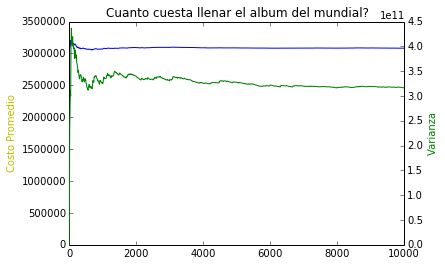

In [68]:
muestra = linspace(0,10000,1000)
fig1,ax1 = subplots()
ax1.plot(muestra,medias1,'b')
ax1.set_ylabel('Costo Promedio',color='y')
ax2 = ax1.twinx()
ax2.plot(muestra,varianzas1,'g')
ax2.set_ylabel('Varianza ',color='g')
title('Cuanto cuesta llenar el album del mundial?')

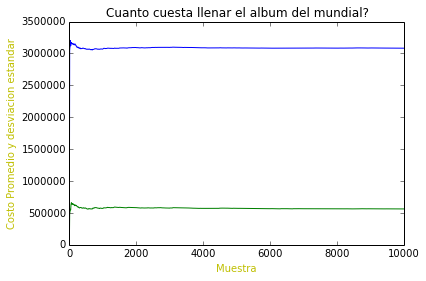

In [70]:
title('Cuanto cuesta llenar el album del mundial?')
muestra = linspace(0,10000,1000)
plot(muestra,medias1,'b',muestra,varianzas1**(0.5),'g')
ylabel('Costo Promedio y desviacion estandar',color='y')
xlabel('Muestra', color = 'y') #el verde es la desviacion estandar, azul es promedio

In [72]:
mediaTotal1 = mean(costos1)
mediaTotal1 #1800909.6 

3082921.0

In [74]:
VarianzaTotal1 = var(costos1)
VarianzaTotal1

316230475199.0

In [75]:
E1 = abs(medias1 - mediaTotal1) #para este caso, dado que cambiamos el 10^5 inicial, 10^-6 no tiene sentido, as[i que tomamos 10**3


In [76]:
E1[E1<100]
mins1 = np.where(E1<1000)
mins1[0]#seleccionamos los que cumplen que son menores a 10**3.

array([ 39,  40,  41,  42, 114, 117, 118, 120, 121, 141, 142, 143, 584,
       585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597,
       598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610,
       611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623,
       624, 625, 626, 627, 628, 629, 630, 632, 634, 635, 641, 642, 643,
       644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656,
       657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669,
       670, 671, 673, 680, 681, 682, 683, 684, 685, 686, 687, 696, 697,
       698, 699, 703, 711, 712, 713, 714, 794, 795, 798, 801, 959, 960,
       961, 962, 965, 971, 974, 975, 976, 977, 978, 980, 981, 982, 983,
       984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996,
       997, 998, 999])

In [77]:
a1 = mins1[0] #este for encuentra los valores de m para los cuales la probabilidad de restar las medias, E, es mayor o igual
# a 95%
prob1 = []
for i in range(len(a1)):
    proba1 = len(a1[i:])/(1000-a1[i])
    #print proba
    if proba1 >= 0.95:
        prob1.append(a1[i])
    

In [79]:
m1 = prob1 # son los valores para los cuales el intervalo de confianza es 0.95 o mas, luego para responder la pregunta m 
#m min = 736, si quieren ver que tiene prob puede abrirse.
m_min1=m1[0]*10
m_min1

9740